In [ ]:
### input gpt code for system, and plot out continuation region C

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from funcs import *

tau*(p0) ≈ 1.0


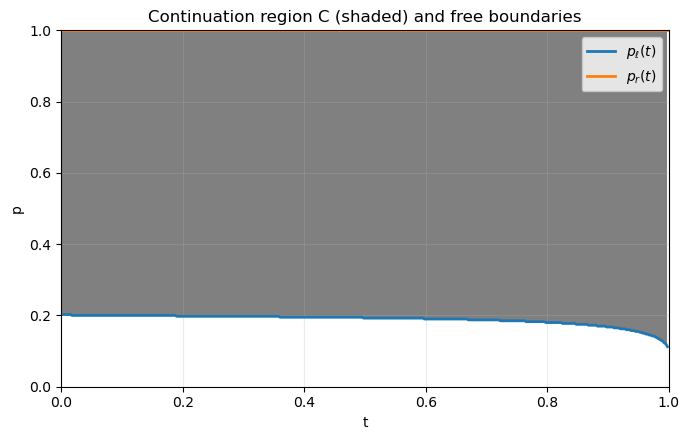

{'no_nans': True,
 'obstacle_feasible': True,
 'terminal_match': True,
 'monotone_in_time_to_go': True,
 'lcp_feasible': True,
 'all_tests_pass': True}

In [3]:
#diminishing returns
if __name__ == "__main__":
    # sample increasing skill functions (replace with your own callables)
    def f0(x):  # safe
        return 0.8 * np.sqrt(np.maximum(x, 0.0))
    def f1(x):  # risky
        return 0.8 * np.sqrt(np.maximum(x, 0.0))

    sol = solve_continuation_region(
        mu=1.0, sigma=1.0, f0=f0, f1=f1, p0=0.5,
        T=1.0, mu0=0.0, M=401, N=400, omega=1.5
    )

    # Example: optimal stop time for p0 as the earliest t where (p0,t) exits C
    p0 = 0.5
    idx_p0 = int(np.argmin(np.abs(sol.p_grid - p0)))
    inC = sol.C_mask[:, idx_p0]
    # times are t_grid; first index where not in C is the stopping time
    first_stop = np.where(~inC)[0]
    tau_star = sol.t_grid[first_stop[0]] if first_stop.size > 0 else sol.t_grid[-1]
    print("tau*(p0) ≈", tau_star)


# For plotting, make time ascend left→right
t_asc   = sol.t_grid[::-1]          # shape (N+1,)
p       = sol.p_grid                # shape (M,)
C_plot  = sol.C_mask.T[:, ::-1]     # shape (M, N+1): rows=y=p, cols=x=t (ascending)

fig, ax = plt.subplots(figsize=(7, 4.5))

# Show C as a shaded bitmap (True=1, False=0)
im = ax.imshow(
    C_plot.astype(float),
    extent=[t_asc[0], t_asc[-1], p[0], p[-1]],
    origin="lower",
    aspect="auto",
    interpolation="nearest",
    cmap="Greys",
    alpha=0.5,
)

# Overlay free boundaries p_left(t), p_right(t)
ax.plot(t_asc, sol.p_left[::-1],  lw=2, label=r"$p_{\ell}(t)$")
ax.plot(t_asc, sol.p_right[::-1], lw=2, label=r"$p_{r}(t)$")

ax.set_xlabel("t")
ax.set_ylabel("p")
ax.set_title("Continuation region C (shaded) and free boundaries")
ax.legend()
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

#test numerics
diag = validate_solution_basic(sol,mu=1.0, sigma=1.0, f0=f0, f1=f1, mu0=0.0, T=1.0)


diag

tau*(p0) ≈ 1.0


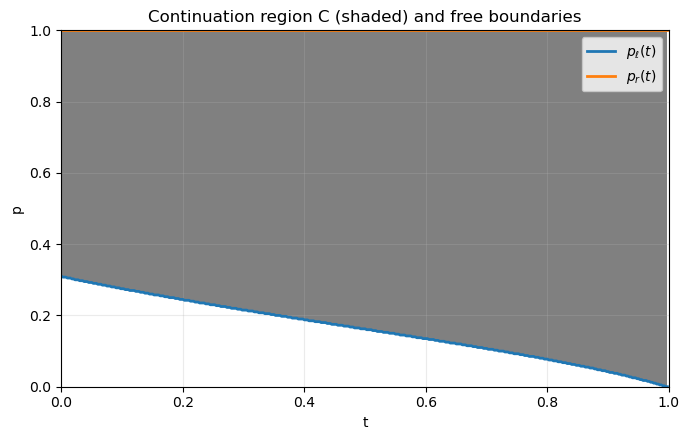

In [12]:
#linear returns
if __name__ == "__main__":
    # sample increasing skill functions (replace with your own callables)
    def f0(x):  # safe
        return (x/1)
    def f1(x):  # risky
        return (x/1)
    sol = solve_continuation_region(
        mu=1.0, sigma=1.0, f0=f0, f1=f1, p0=0.5,
        T=1.0, mu0=0.0, M=401, N=400, omega=1.5
    )

    # Example: optimal stop time for p0 as the earliest t where (p0,t) exits C
    p0 = 0.5
    idx_p0 = int(np.argmin(np.abs(sol.p_grid - p0)))
    inC = sol.C_mask[:, idx_p0]
    # times are t_grid; first index where not in C is the stopping time
    first_stop = np.where(~inC)[0]
    tau_star = sol.t_grid[first_stop[0]] if first_stop.size > 0 else sol.t_grid[-1]
    print("tau*(p0) ≈", tau_star)


# For plotting, make time ascend left→right
t_asc   = sol.t_grid[::-1]          # shape (N+1,)
p       = sol.p_grid                # shape (M,)
C_plot  = sol.C_mask.T[:, ::-1]     # shape (M, N+1): rows=y=p, cols=x=t (ascending)

fig, ax = plt.subplots(figsize=(7, 4.5))

# Show C as a shaded bitmap (True=1, False=0)
im = ax.imshow(
    C_plot.astype(float),
    extent=[t_asc[0], t_asc[-1], p[0], p[-1]],
    origin="lower",
    aspect="auto",
    interpolation="nearest",
    cmap="Greys",
    alpha=0.5,
)

# Overlay free boundaries p_left(t), p_right(t)
ax.plot(t_asc, sol.p_left[::-1],  lw=2, label=r"$p_{\ell}(t)$")
ax.plot(t_asc, sol.p_right[::-1], lw=2, label=r"$p_{r}(t)$")

ax.set_xlabel("t")
ax.set_ylabel("p")
ax.set_title("Continuation region C (shaded) and free boundaries")
ax.legend()
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


tau*(p0) ≈ 1.0


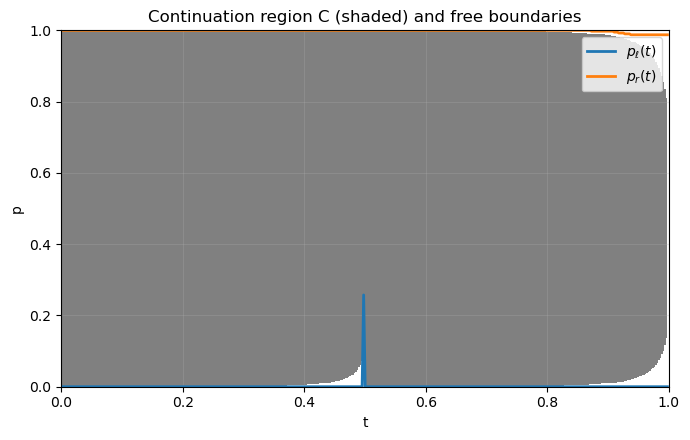

In [13]:
#discontinuity
if __name__ == "__main__":
    # sample increasing skill functions (replace with your own callables)
    def f0(x):  # safe
        return 0.1 if x > 0.5 else 0
    def f1(x):  # risky
        return 0.1 if x > 0.5 else 0
    sol = solve_continuation_region(
        mu=1.0, sigma=1.0, f0=f0, f1=f1, p0=0.5,
        T=1.0, mu0=0.0, M=401, N=400, omega=1.5
    )

    # Example: optimal stop time for p0 as the earliest t where (p0,t) exits C
    p0 = 0.5
    idx_p0 = int(np.argmin(np.abs(sol.p_grid - p0)))
    inC = sol.C_mask[:, idx_p0]
    # times are t_grid; first index where not in C is the stopping time
    first_stop = np.where(~inC)[0]
    tau_star = sol.t_grid[first_stop[0]] if first_stop.size > 0 else sol.t_grid[-1]
    print("tau*(p0) ≈", tau_star)


# For plotting, make time ascend left→right
t_asc   = sol.t_grid[::-1]          # shape (N+1,)
p       = sol.p_grid                # shape (M,)
C_plot  = sol.C_mask.T[:, ::-1]     # shape (M, N+1): rows=y=p, cols=x=t (ascending)

fig, ax = plt.subplots(figsize=(7, 4.5))

# Show C as a shaded bitmap (True=1, False=0)
im = ax.imshow(
    C_plot.astype(float),
    extent=[t_asc[0], t_asc[-1], p[0], p[-1]],
    origin="lower",
    aspect="auto",
    interpolation="nearest",
    cmap="Greys",
    alpha=0.5,
)

# Overlay free boundaries p_left(t), p_right(t)
ax.plot(t_asc, sol.p_left[::-1],  lw=2, label=r"$p_{\ell}(t)$")
ax.plot(t_asc, sol.p_right[::-1], lw=2, label=r"$p_{r}(t)$")

ax.set_xlabel("t")
ax.set_ylabel("p")
ax.set_title("Continuation region C (shaded) and free boundaries")
ax.legend()
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [ ]:
###